In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Getting Training data

In [16]:
dfx = pd.read_csv('/home/shaggy/ML/NoteBooks/LinearRegressionData/Training Data/Linear_X_Train.csv')
dfy = pd.read_csv('/home/shaggy/ML/NoteBooks/LinearRegressionData/Training Data/Linear_Y_Train.csv')


In [17]:
x = dfx.values
y = dfy.values

#x = x.reshape((-1,))
#y = y.reshape((-1,))

print(x.shape)
print(y.shape)

(3750, 1)
(3750, 1)


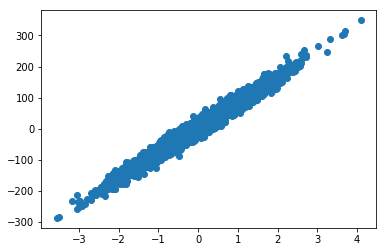

In [18]:
## Visualise and PreProceess the Data
plt.scatter(x,y)
plt.show()

# Gradient Algorithm

In [19]:
def hypothesis(X,theta):
    return theta[0]+theta[1]*X

def error(X,Y,theta):
    m = X.shape[0]
    
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += ((hx -Y[i])**2)
        
        
   # error = (error/2*m)
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += (hx - Y[i])
        grad[1] += (hx - Y[i])*X[i]
        
    return grad

# Algorithm
def gradientDecent(X,Y,learning_rate=0.00001):
    theta = np.array([-10.0,300.0],dtype=np.float128)
    itr = 0
    max_itr = 500
    error_list = []
    theta_list = []
    
    while(itr <= max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
        itr+=1
        
    return theta,error_list,theta_list

In [20]:
final_theta,error_list,theta_list = gradientDecent(x,y)

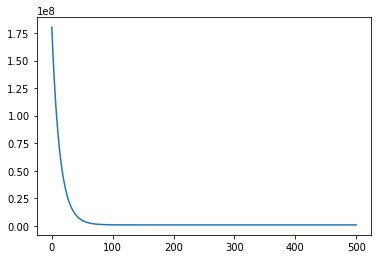

In [21]:
plt.plot(error_list)
plt.show()

In [22]:
print(final_theta)

[ 3.72798918 80.54363356]


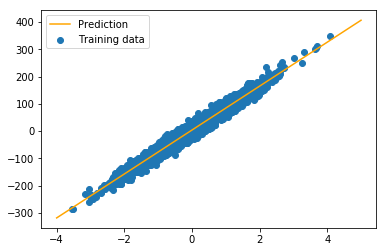

In [23]:
## plot line for test data

xtest = np.linspace(-4,5,100)
plt.scatter(x,y,label='Training data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='Prediction')
plt.legend()
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [25]:
dfx_test = pd.read_csv('/home/shaggy/ML/NoteBooks/LinearRegressionData/Test Cases/Linear_X_Test.csv')

In [26]:
x_test = dfx_test.values
print(x_test[0])

[-1.87794441]


In [27]:
predictions = lm.predict(x_test)
print(predictions[0])

[-147.52847525]


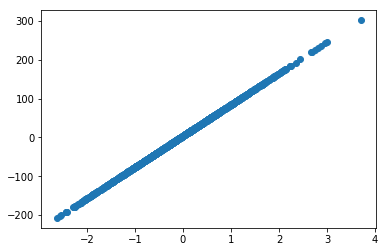

In [28]:
plt.scatter(x_test,predictions)
plt.show()